# Farewell Round A

## $\color{sategray}{\mathbb{Task \;1}}$ Colliding Encoding
### $\color{sategray}{\mathbb{Problem}}$
Alan just had his first cryptography class in school today. <br/>
He decided to apply what he learned and come up with his own cipher. <br/>
He will map each English letter from `A` to `Z` to a decimal digit `0` through `9`. <br/>
He will then try to encode 
- each word to a string consisting of decimal digits 
- by replacing each letter in the word with its mapped digit.

In his excitement, Alan failed to notice that there are 
- `26` letters in the English alphabet and 
- only `10` decimal digits. 

As a result, there might be collisions, <br/>
that is, pairs of different words whose encoding is the same.<br/>
Given a list of `N` words that Alan wants to encode and the mapping that he uses, <br/>
can you find out if there would be any collisions between words on the list?

#### Input
The first line of the input gives the number of test cases, `T`.<br/> 
`T` test cases follow. <br/>
The first line of each test case contains 
- `26` decimal digits (integers between 0 and 9, inclusve) `DA,DB,…,DZ`, 
- representing the mapping that Alan uses. 

A letter `α` is mapped to digit `Dα`.<br/>
The second line of each test case contains `N`, the number of words Alan will encode. <br/>
The `i`-th of the last `N` lines contains a string `Si`, representing the `i`-th word Alan will encode.

#### Output
For each test case, output one line containing <br/>
`Case #x: y`, where 
- `x` is the test case number (starting from 1) and 
- `y` is either 
    - `YES`, <br/>
    if there is at least one pair of different words from the list whose encoding coincides, 
    - and `NO` otherwise.

#### Limits
##### Time limit: 20 seconds.
##### Memory limit: 2 GB.
##### `1≤T≤100`.
##### `0≤Dα≤9`, for all `α`.
##### `1≤the length of Si≤10`, for all `i`. 
Each character of `Si` is an uppercase English letter `A` through `Z`, for all `i`.
##### `Si≠Sj`, for all `i≠j`.

#### Test Set 1 (Visible Verdict)
##### `1≤N≤100`.
#### Test Set 2 (Visible Verdict)
##### `1≤N≤6×104`.

<pre><code>
Sample Input
2
0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
4
ABC
BC
BCD
CDE
0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
3
CDE
DEF
EFG

Sample Output
Case #1: NO
Case #2: YES
</code></pre>

In Sample Case #1, the mapping 
- for A is 0, 
- for B is 1, 
- for C is 2, 
- for D is 3, and 
- for E is 3. 

With this mapping, 
- ABC is encoded as 012, 
- BC is encoded as 12, 
- BCD as 123, and 
- CDE as 233. 

Since all of these encodings are distinct, there are no collisions.

In Sample Case #2, the mapping 
- for C is 2, 
- for D is 3, 
- for E is 3, 
- for F is 3, and 
- for G is 3. 

With this mapping, 
- CDE is encoded as 233, 
- DEF as 333, and 
- EFG as 333. 

Since the encoding for DEF and EFG is the same, there is a collision.

In [ ]:
T=int(input())
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for t in range(T):
    D=input().replace(' ','')
    N=int(input())
    numbers=set()
    words=set()
    for i in range(N):
        w=input()
        words.update([w])
        n=''.join([D[letters.find(s)] for s in w])
        numbers.update([n])
    if len(numbers)<len(words):
        print('Case #{}: YES'.format(t+1))
    else:
        print('Case #{}: NO'.format(t+1))


1
0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
1
ABC
Case #1: NO


In [ ]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
digits='01233333333333333333333333'
ld=dict(zip(list(letters),list(digits)))
ld['A']

'0'

In [ ]:
T=int(input())
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for t in range(T):
    digits=input().replace(' ','')
    ld=dict(zip(list(letters),list(digits)))
    N=int(input())
    numbers=set()
    words=set()
    answer='NO'
    for i in range(N):
        w=input()
        words.update([w])
        n=''.join([ld[s] for s in w])
        numbers.update([n])
        if len(numbers)<len(words):
            answer='YES'
    print('Case #{}: {}'.format((t+1),answer))

1
0 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
3
CDE
DEF
EFG
Case #1: YES


## $\color{sategray}{\mathbb{Task \;2}}$ Illumination Optimization
### $\color{sategray}{\mathbb{Problem}}$
<p> Onyaomale is leading a project to exchange the lightbulbs from street lights along a freeway <br/>
from incandescent ones to LED lightbulbs that are both more energy-efficient and powerful. <br/>
She started by taking all the old incandescent lightbulbs out, and is now focused on installing the new LED ones. <br/>
Because the new lightbulbs are more powerful,<br/>
Onyaomale thinks it is possible that some street lights are not necessary and <br/>
she can save even more energy by not using them.</p>
<p>We model the freeway as a straight line measuring M
 meters that goes from west to east. <br/>
The `x-th` meter is a point that is `x` meters to the east of the western end of the freeway. <br/>
If a street light is located at the `x-th` meter, <br/>
and a lightbulb with an illumination radius of `R`
 meters is installed on it, <br/>
then the street light illuminates the segment of freeway <br/>
starting at the `max(0,x−R)-th` meter and <br/>
ending at the `min(M,x+R)-th` meter, inclusive. </p>
<p>Onyaomale needs to install lightbulbs in such a way that <br/>
every point of the freeway is illuminated by at least one of them. <br/>
Notice that this includes illuminating points that are not an integer number of meters away from the freeway endpoints.<br/> 
Street lights that are left without a lightbulb do not illuminate anything.</p>
<p>Given the length of the freeway in meters `M`
, <br/>
the illumination radius of the new lightbulbs `R`, <br/>
and the locations of all street lights, <br/>
find the minimum number of lightbulbs Onyaomale needs to install to illuminate the whole freeway, <br/>
or report that it is impossible to do so.</p>

#### Input
<p>The first line of the input gives the number of test cases, `T`. <br/>
`T` test cases follow.<br/>
Each test case consists of two lines. <br/>
The first line contains three integers `M`, `R`, and `N`:<br/>
the length, in meters, of the freeway, <br/>
the illumination radius, in meters, of the lightbulbs, and <br/>
the number of street lights, respectively. <br/>
The second line of a test case contains N sorted integers `X1,X2,…,XN` <br/>
representing the meters of the freeway where street lights are located.</p>

#### Output
<p>For each test case, output one line containing <br/>
`Case #x: y`, where <br/>
`x` is the test case number (starting from 1) and <br/>
`y` is the minimum number of lightbulbs Onyaomale needs to install to illuminate the whole freeway,<br/>
if it is possible. <br/>
If there is no way to illuminate the entire freeway using the current street lights, <br/>
y should be `IMPOSSIBLE` instead.</p>

#### Limits
<p>Time limit: 10 seconds.</p>
<p>Memory limit: 2 GB.</p>

- `1≤T≤100`.
- `1≤M≤109`.
- `1≤R≤109`.
- `0≤X1`.
- `Xi < Xi+1`, for all i.<br/>
- `XN≤M`.

#### Test Set 1 (Visible Verdict)
`1≤N≤10`.

#### Test Set 2 (Visible Verdict)
`1≤N≤105`.

<pre><code>
Sample Input
3
10 3 3
2 7 9
10 2 3
2 7 9
10 2 4
2 3 7 9
Sample Output
Case #1: 2
Case #2: IMPOSSIBLE
Case #3: 4
</code></pre>

In Sample Case #1, Onyaomale can illuminate the entire freeway by
- placing bulbs in the western-most and middle street lights only,
- leaving the eastern-most one unused. 

With these two lights covering [0,5] and [4,10], the entire freeway ([0,10]) is illuminated.

---

In Sample Case #2, Onyaomale has 
- the same configuration as in Sample Case #1, 
- but with weaker lightbulbs. In this case, 
- there is no way for her to illuminate the entire freeway. 

In particular, 
- even if all the street lights are lit, 
- the middle point between the 4-th and 5-th meters would still not be illuminated.

---

For Sample Case #3 Onyaomale has 
- an additional street light at the 3-th meter, 
- compared to Sample Case #2, 
- while all other conditions are the same. 

In this case, 
- installing a lightbulb in every street light is 
- the only way to have the entire freeway illuminated.


Case #1
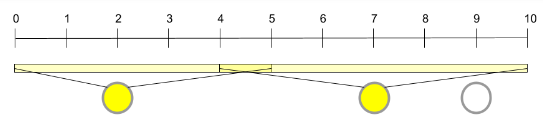

Case #2
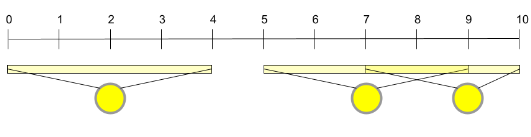

Case #3
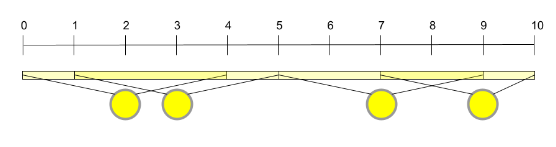

In [ ]:
def update(i,start,end,radius,condition,answer):
    while (i<N):
        if X[i]-start>radius: break
        else: end=X[i]
        i+=1
    if end!=condition: 
        answer+=[end]
        start=end
    else:
        answer=[]
    return i,start,end,answer
T=int(input())
#T=1
for t in range(T):
    [M,R,N]=list(map(int,input().split()))
#    [M,R,N]=list(map(int,'12 2 6'.split()))
    X=list(map(int,input().split()))
#    X=list(map(int,'0 3 4 7 8 9'.split()))
    i,start,end,answer=0,0,-1,[]
    i,start,end,answer=update(i,start,end,R,-1,answer)
 #   print(i,start,end,answer)
    while ((i<N) and (answer!=[]) and (end+R<M)):
        i,start,end,answer=update(i,start,end,2*R,start,answer)
 #       print(i,start,end,answer)
    if M-end>R: answer=[]
    if answer!=[]:
        print('Case #{}: {}'.format((t+1),len(answer)))
    else: 
        print('Case #{}: IMPOSSIBLE'.format(t+1))

3
10 3 3
2 7 9
Case #1: 2
10 2 3
2 7 9
Case #2: IMPOSSIBLE
10 2 4
2 3 7 9
Case #3: 4


## $\color{sategray}{\mathbb{Task \;3}}$ Rainbow Sort
### $\color{sategray}{\mathbb{Problem}}$
<p>Your friend Charles gives you a challenge. <br/>
He puts `N` cards on a table and arranges them in a line in an order that he chooses. <br/>
Each card has a single color, and each color can be on one or more cards.</p>

Charles then asks you to write a positive integer on each card without altering his chosen order such that:
- The integers you write appear in non-decreasing order when cards are read from left to right.
- Cards of the same color have the same integer written on them.
- Cards of different colors have different integers written on them.

<p>Finally, Charles wants you to order the colors in increasing order of written integer.</p>

For example, if 
- blue cards have a 2, 
- red cards have a 5, and 
- green cards have a 3, 

the color order would be blue, green, red.

#### Input
<p>The first line of the input gives the number of test cases, $T$. <br/>
$T$ test cases follow.<br/>
Each test case begins with a line containing the integer $N$. 
The next line contains $N$ integers, $S1, S2, …, SN,$ <br/>
where $Si$ represents the color of the $i-th$ card from the left.</p>

#### Output
<p>For each test case, output one line containing <br/>
Case #$x: \; y,$ where <br/>
$x$ is the test case number (starting from 1) and <br/>
$y$ is the set of colors, once each, listed in the requested order. <br/>
If it is impossible to write integers in the given cards while adhering to all the rules, <br/>
$y$ must be $IMPOSSIBLE$ instead.

#### Limits
<p>Time limit: 20 seconds.</p>
<p>Memory limit: 2 GB.</p>

- $1≤T≤100$.
- $1≤Si≤105$, for all i.

#### Test Set 1 (Visible Verdict)
$1≤N≤10$.
#### Test Set 2 (Visible Verdict)
$1≤N≤105$.

<pre><code>
Sample Input
2
4
3 8 8 2
5
3 8 2 2 8

Sample Output
Case #1: 3 8 2
Case #2: IMPOSSIBLE
</code></pre>

<p>In Sample Case #1, there are 3 different colors on 4 cards. <br/>
One possible solution is to write the following integers, in order: 1, 2, 2, and 3. <br/>
Notice that the same integer (2) is written on both cards of color 8. <br/>
Then, the order of the colors is 3, 8, 2.</p>

<p>In Sample Case #2, let c8 and c2 be the integers written in cards of color 8 and 2, respectively. <br/>
If c2 > c8 then the rightmost two cards would not have their integers in non-decreasing order. <br/>
If c2 < c8 that would happen to the second and third card from the left. <br/>
Finally, c8 = c2 is forbidden by one of the rules. <br/>
Therefore, there is no valid way of writing the integers in this case.</p>

In [ ]:
T=int(input())
for t in range(T):
    N=int(input())
    cards=input().split()
    cards_set=set()
    result=[]
    for i in range(N):
        if cards[i] not in cards_set:
            cards_set.update([cards[i]])
            result.append(cards[i])
        elif result[-1]!=cards[i]:
            result='IMPOSSIBLE'
            break
 #       print(i,result)
    if result!='IMPOSSIBLE': result=' '.join(result)
    print('Case #{}: {}'.format((t+1),result))

1
5
3 8 2 2 8
Case #1: IMPOSSIBLE


## $\color{sategray}{\mathbb{Task \;4}}$ ASCII Art
### $\color{sategray}{\mathbb{Problem}}$
<p>Cody-Jamal has heard about generative artificial intelligence producing art. <br/>
He is excited about the new art opportunities, but also worried about human-created art being displaced. <br/>
He thought a good compromise would be to use computers to create art that humans simply cannot.</p>
<p>Since Cody-Jamal is just beginning at computer-generated art, he started simple. <br/>
He wants to create an immense string that shows the English alphabet in a doubly-repeated way, <br/>
to represent its ubiquity and permanence.<br/>

Cody-Jamal wrote the following program:
<pre><code>
for i = 1 to 1e100:
  for letter = A to Z:
    print letter i times

</code></pre>
<p>Here $1e100$ represents the integer $10^{100}$.</p> 

For example:
- When $i=1$, the program prints $ABCD....XYZ$.
- When $i=2$, the program prints $AABBCC...XXYYZZ$.
- When $i=3$, the program prints $AAABBBCCC...XXXYYYZZZ$.

<p>Of course, Cody-Jamal's program takes a long time to finish. <br/>
Can you help him know what the $N-th$ printed letter will be without waiting for it to be printed?</p>

#### Input
<p>The first line of the input gives the number of test cases, `T`. <br/>
`T` test cases follow. <br/>
Each test case consists of a single line with an integer `N`.</p>

#### Output
<p>For each test case, output one line containing <br/>
<b>Case #x: y</b>, where <br/>
x is the test case number (starting from 1) and <br/>
y is the N-th character printed by Cody-Jamal's program.</p>

#### Limits
<p>Time limit: 20 seconds.<br/>
Memory limit: 2 GB.</p>

`1≤T≤100`.

#### Test Set 1 (Visible Verdict)
`1≤N≤106`.

#### Test Set 2 (Visible Verdict)
`1≤N≤1012`.

<pre><code>
Sample Input
2
5
31
Sample Output
Case #1: E
Case #2: C
</code></pre>

The first 35 letters printed by Cody-Jamal's program are 

ABCDEFGHIJKLMNOPQRSTUVWXYZAABBCCDDE.... 

Therefore, the 5th printed character is E and the 31st is C.

In [ ]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
def count26down(number):
    diff1,i,j=number,1,0
    while number>0:
        diff1=number; k1=i
        number-=i*26; i+=1
    while diff1>0:
        diff2=diff1; k2=j
        diff1-=k1; j+=1
    return k2
T=int(input())
for t in range(T):
    N=int(input())
    L=letters[count26down(N)]
    print('Case #{}: {}'.format((t+1),L))

2
5
Case #1: E
31
Case #2: C


In [ ]:
letters[count26down(1001)]

'H'

## $\color{sategray}{\mathbb{Task \;5}}$ Untie
### $\color{sategray}{\mathbb{Problem}}$
<p>A group of people are sitting in a circle, playing a special version of rock, paper, scissors. <br/>
In this game, each person chooses rock, paper, or scissors in secret and <br/>
then everyone reveals their choice to everyone else. <br/>
Each person then compares their selection to their two neighbors, <br/>
and can win, lose, or tie against each of them independently. <br/>
The only way to tie is when both people make the same choice.</p>

You want to make it so that no game is a tie. <br/>
For each player, <br/>
! you can let them keep their choice, or <br/>
! you can ask them to change to any of the other two options <br/>
(you choose to which one). <br/>
What is the minimum number of people you need to request a change from to ensure that <br/>
there are no ties between neighbors after those changes are made?

#### Input
<p>The first line of the input gives the number of test cases, T. <br/>
T lines follow. <br/>
Each line represents a test case and contains a string C. <br/>
The i-th character of C represents the original choice <br/>
of the i-th person in clockwise order using 
<ul>
  <li>an uppercase R to mean rock,</li>
  <li>an uppercase P to mean paper,</li>
  <li>and an uppercase S to mean scissors.</li>
</ul></p>

#### Output
<p>For each test case, output one line containing 
<b>Case #x: y</b>, where <br/>
x is the test case number (starting from 1) and <br/>
y is the minimum number of changes <br/>
that are required such that no two neighbors end up with the same choice.</p>

#### Limits
<p>Time limit: 10 seconds.<br/>
Memory limit: 2 GB.</p>

`1≤T≤100`.

<p>Each character of C is either
<ul>
  <li>an uppercase R,</li>
  <li>an uppercase P,</li>
  <li>or an uppercase S.</li>
</ul></p>


#### Test Set 1 (Visible Verdict)
`3≤ the length of C≤10`.

#### Test Set 2 (Visible Verdict)
`3≤ the length of C≤1000`.

<pre><code>
Sample Input
3
PRSSP
RRRRRRR
RSPRPSPRS
Sample Output
Case #1: 2
Case #2: 4
Case #3: 0
</code></pre>

In Sample Case #1, 
- there is a pair of neighbors that both chose paper 
- (the first and last character of the input) and 
- another pair that both chose scissors. 

Therefore, we need at least two changes. 

One way of doing it with two changes is 
- to change the leftmost paper to scissors and 
- the rightmost scissors to rock, 
- to obtain SRSRP.

---

In Sample Case #2, all 7 participants chose rock. 

If we change at most 3 selections, 
- there will be at least 4 remaining rocks, and 
- at least two of them will be neighbors. 

Therefore, the minimum number of changes is at least 4. 

One way to achieve exactly 4 is to get PRSRPRS.

---

In Sample Case #3, no pair of neighbors tied, so no changes are needed.

In [ ]:
T=int(input())
for t in range(T):
    C=input()
    count=0
    if len(set(C))==1:
        count=len(C)//2+len(C)%2
    else:
        while C[0]==C[-1]:
            C=C[1:]+C[0]
        count=C.count('PP')+C.count('SS')+C.count('RR')
    print('Case #{}: {}'.format((t+1),count))       

3
PRSSP
Case #1: 2
RRRRRRR
Case #2: 4
RSPRPSPRS
Case #3: 0
